# Car Price Prediction

Aim of this project is to predict Selling Price of Second Hand cars based on various features

### Dataset

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho


## Life cycle for Data Science Project

1. Data Gathering
2. Exploratory Data Analysis 
3. Feature Engineering 
4. Feature Selection
5. Model Building
6. Model Deployment

------------------


#### Import Libraries

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import pylab
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import StandardScaler

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import  XGBRegressor

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingRegressor

### 1. Data Gathering

In [3]:
dataset = pd.read_csv('car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.shape

(301, 9)

### 2.Exploratory Data Analysis

EDA is Done to find out following :
1. Missing values
2. Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between Each Independent and Dependent Feature (Sales Price)

##### 1. Missing Values 

- We will check whether there is any missing value in Dataset 
- Percentage of NAN values in Each Feaure

In [5]:
#There are no missing values in any feature
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Check percentage of Nan values in Each Feature
features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]

if not features_with_nan:
  print('There are no Missing Values in Any Feature')
else :
  for feature in features_with_nan:
    print(feature ,'  \t ', np.round(dataset[feature].isnull().mean(),4), '% missing values ')

There are no Missing Values in Any Feature


If there were any missing values in any feature , we would find out the relationship between that feature and Selling price.

And if we got any relationship between missing value and Dependent variable we would need to handle the missing values by using various techniques in Feature Engineering

##### Dropping out features which are not usefull

In [7]:
dataset = dataset.drop(['Car_Name'],axis=1)
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### 2.Numerical Variables

It is of Two Types
1. Discrete Random Variable
2. Continous Random Variable

In [8]:
numerical_features = [features for features in dataset.columns if dataset[features].dtypes != 'O' ]

print('Number of Numerical Features' , len(numerical_features),'\n\n')
print(numerical_features,'\n\n')

dataset[numerical_features].head()

Number of Numerical Features 5 


['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'] 




,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


From above Dataframe we can also see Datetime Feature

##### Temporal Variable

In [9]:
year_feature = [feature for feature in dataset.columns if 'Year' in feature or 'Year' in feature]
year_feature

['Year']

### Analyzing Temporal Variabel - Datetime Variable

We will check whether there is any relationship between Year and Selling Price

In [10]:
data = dataset.copy()
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data.groupby('Year')['Selling_Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2003,2.0,1.300000,1.343503,0.35,0.8250,1.300,1.7750,2.25
2004,1.0,1.500000,NaN,1.50,1.5000,1.500,1.5000,1.50
2005,4.0,2.487500,1.565469,0.20,2.1125,3.120,3.4950,3.51
2006,4.0,1.437500,1.081184,0.10,0.8125,1.575,2.2000,2.50
2007,2.0,0.160000,0.056569,0.12,0.1400,0.160,0.1800,0.20
2008,7.0,1.002857,1.471753,0.17,0.2000,0.250,1.1000,4.00
2009,6.0,2.816667,1.085664,0.90,2.4375,3.175,3.5375,3.80
2010,15.0,5.262667,8.767003,0.16,0.4850,2.650,5.0000,35.00
2011,19.0,2.375263,1.476977,0.15,0.7750,2.700,2.9750,4.50


In [12]:
dataset.groupby('Year')['Selling_Price'].median()

Year
2003    1.300
2004    1.500
2005    3.120
2006    1.575
2007    0.160
2008    0.250
2009    3.175
2010    2.650
2011    2.700
2012    3.100
2013    3.500
2014    4.450
2015    5.250
2016    5.250
2017    3.500
2018    9.250
Name: Selling_Price, dtype: float64

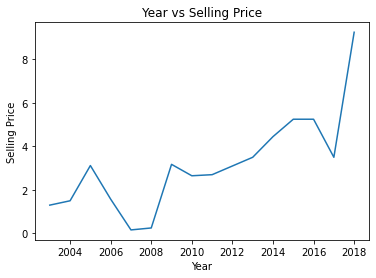

In [13]:
data_featm = dataset.groupby('Year')['Selling_Price'].median()
sns.lineplot(x=data_featm.index, y=data_featm.values)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price')
plt.show()

Selling Price is increasing with every year.

Now we will add One more Feature "Age_of_car" which indicates car age.And then we will see its distribution as well with Selling Price

In [14]:
dataset['Age_of_Car'] = 2021 - dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
dataset.drop('Year',axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Distribution of Age_Of_Car with Selling price

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


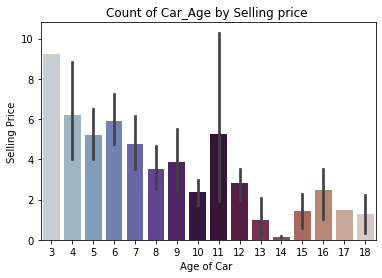

In [16]:
sns.barplot(dataset['Age_of_Car'],dataset['Selling_Price'],palette='twilight')
plt.title('Count of Car_Age by Selling price ')
plt.xlabel('Age of Car ')
plt.ylabel('Selling Price')
plt.show();

From Above Figure , We can say that if the Car Age is Minimum then Selling price is High or else it is low

i-e OLD Cars Cost less than New Cars

#### 1. Discrete Feature

In [17]:
numerical_features.remove('Year')

In [18]:
numerical_features

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [19]:
numerical_features.remove('Selling_Price')
numerical_features

['Present_Price', 'Kms_Driven', 'Owner']

In [20]:
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25]
print('Discrete Value Count : {}'.format(len(discrete_feature)))
discrete_feature

Discrete Value Count : 1


['Owner']

Relationship between Discrete Feature and Selling Price

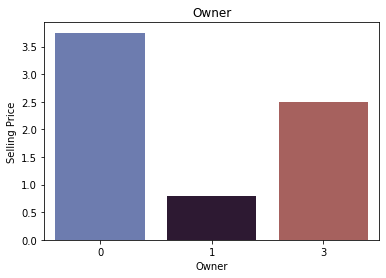

In [21]:
for feature in discrete_feature:
    data = dataset.copy()
    data_feat = data.groupby(feature)['Selling_Price'].median()
    sns.barplot(x=data_feat.index,  y= data_feat.values, palette='twilight')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
    plt.title(feature)
    plt.show()

#### 2. Continous Feature

In [22]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print('Number of Continous Feature : {}'.format(len(continuous_feature)))
continuous_feature

Number of Continous Feature : 2


['Present_Price', 'Kms_Driven']

In [23]:
dataset['Present_Price'].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

#### Distribution of Continuous Feature

Here we will create Histograms for each feature 

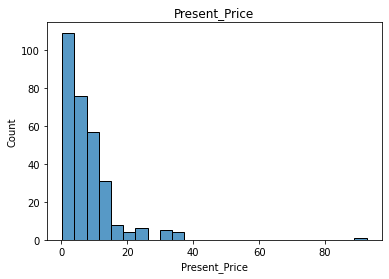

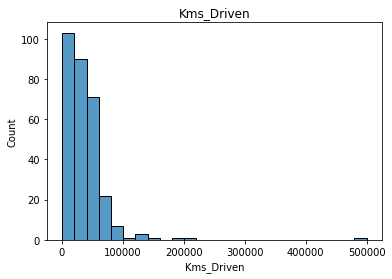

In [24]:
for feature in continuous_feature:
    data =dataset.copy()
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=data,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In above figure , We can see that distribution is Skewed i-e Log Normal Distribution , We will have to do Feature Transformation in Feature Engineering if we dont use any ensemble techniques

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


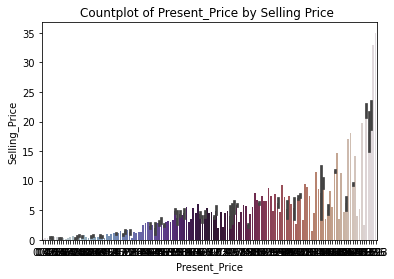

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


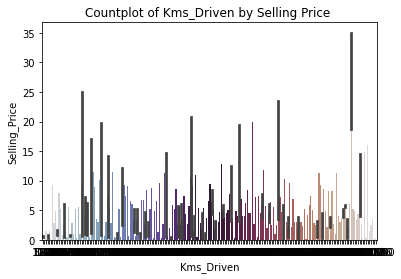

In [25]:
for feature in continuous_feature:
  sns.barplot(dataset[feature],dataset['Selling_Price'],palette='twilight')
  plt.title('Countplot of {} by Selling Price '.format(feature))
  plt.show()

### 4. Categorical Variables

In [26]:
categorical_features = [feature for feature in dataset.columns if data[feature].dtypes=='O']
print(len(categorical_features))
categorical_features

3


['Fuel_Type', 'Seller_Type', 'Transmission']

In [27]:
dataset[categorical_features].head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


### 5. Cardinality of Categorical Feature

How many unique categories does each Cateogrical Feature have?

In [28]:
for feature in categorical_features:
    print('Feature : {} \t Number of Unique Categories : {} '.format(feature,len(dataset[feature].unique())))

Feature : Fuel_Type 	 Number of Unique Categories : 3 
Feature : Seller_Type 	 Number of Unique Categories : 2 
Feature : Transmission 	 Number of Unique Categories : 2 


Since there are less no of Unique Cateogries in each feature we can use One Hot Encoding , If there were many unique cateogires in any of feature , We would have use any other Categorical Encoding Technique

#### 6. Relationship between categorical feature and Selling price

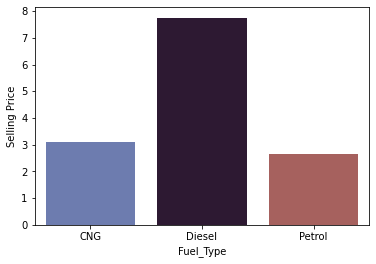

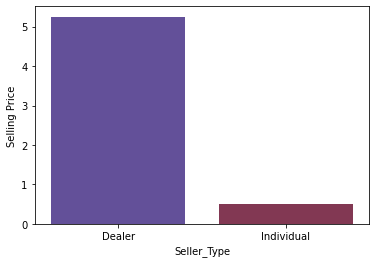

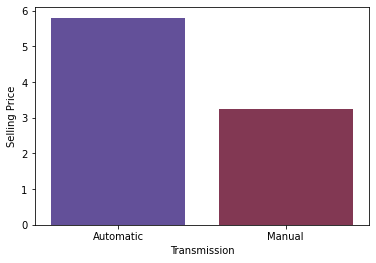

In [29]:
for feature in categorical_features:
    data = dataset.copy()
    data_feat = data.groupby(feature)['Selling_Price'].median()
    sns.barplot(x=data_feat.index,  y= data_feat.values, palette='twilight')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
    plt.show()

### 7. Outliers

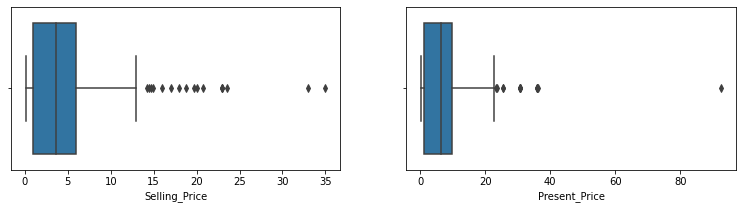

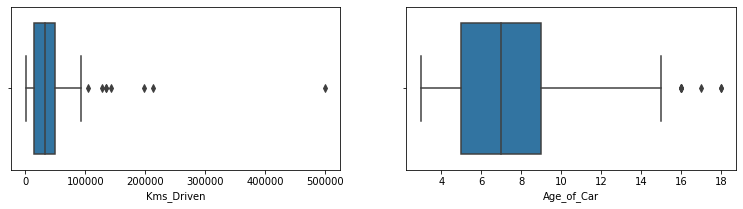

In [30]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven','Age_of_Car']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    
    plt.show()

We will check by viewing the whole row

In [31]:
def find_outlier_in_dataframe(list_of_features):
  for feature in list_of_features:
    print(feature,'\n')
    display(dataset[dataset[feature] > dataset[feature].quantile(0.99)])
    print('\n')

find_outlier_in_dataframe(['Selling_Price','Present_Price','Kms_Driven','Age_of_Car'])

Selling_Price 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
63,23.5,35.96,47000,Diesel,Dealer,Automatic,0,6
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,11




Present_Price 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,11




Kms_Driven 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
84,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,13




Age_of_Car 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
37,0.35,2.28,127000,Petrol,Individual,Manual,0,18
39,2.25,7.98,62000,Petrol,Dealer,Manual,0,18
77,1.50,12.35,135154,Petrol,Dealer,Automatic,0,17


In [32]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Summary of EDA analysis: how the independent features influence the dependent feature (Selling_Price)

1. Present_Price: as Present_Price increases, Selling_Price increases, even though the increase is kind of steep at the end, overall it shows a linear correlation.
2. Kms_Driven: no correlation was found.
3. Fuel_Type: Car's with diesel is much more expensive than those with Petrol and CNG around 3 times
4. Seller_Type: Car's sold by dealer have higher Selling_Price than the individual sellers by 700% 
5. Transmission: Automatic transmission costs more than Manual more than 2 times! 
6. Owner: Not used cars cost more than those who have owners
7. Car_Age: unsurprisingly, old cars cost less than brand new

There are outliers in "Present price,Selling Price,Kms_Driven,Car_Age.We will have to handle that

### Feature Engineering 

1. Handling Imbalanced dataset
2. Handling Missing Value
3. Handling Outliers
4. Categorical Encoding
5. Feature Transformation

#### 1. Handling Imabalanced dataset 

We will see the count plot of Dependent varaible to check whether the dataset is imbalanced or not.

Since it is not a Classification problem , So we will skip these step 

### 2. Handling Missing Values

In Exploratory Data Analysis we found that , There is no missing values in any Feature.We will move on to the next step

### 3. Handling Outliers

Algorithms that are Sensitive/Not Sensitive to outlier:

1. Linear and Logistic Regresssion - Sensitive -- Remove
2. Decision Tree Classifier/Regressor - Not Sensitive -- Keep
3. Naive Bayes Classifier - Not Sensitive -- keep
4. SVM,Ensemble,KNN - Not Sensitive --keep

So further we will be using Linear Regression -- Remove outlier and will create a new dataframe 

For Ensemble techniques we will not remove an outlier and will train our model on original dataset

When Data is not normally distributed in Feature we will calculate extreme Lower and Upper values 

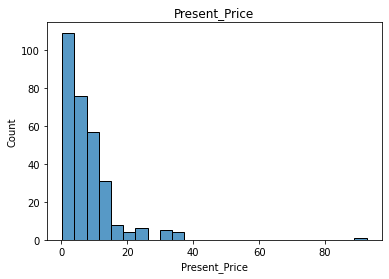

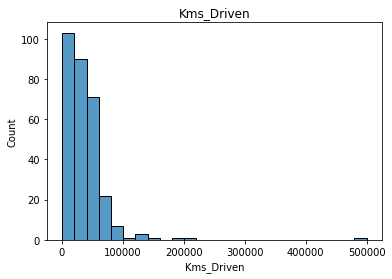

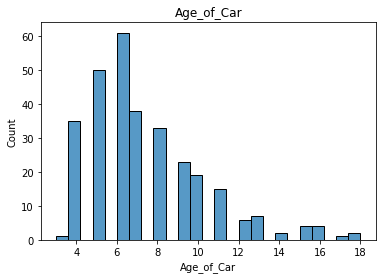

In [33]:
for feature in ['Present_Price','Kms_Driven','Age_of_Car']:
    data =dataset.copy()
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=data,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [34]:
dataset_norm_reg = dataset.copy()
dataset_norm_reg.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [35]:
def lower_upper_not_normal_outlier(features):
  for feature in features:
    iqr = dataset_norm_reg[feature].quantile(0.75) - dataset_norm_reg[feature].quantile(0.25)
    lower_bridge = dataset_norm_reg[feature].quantile(0.25) - (iqr * 3)
    upper_bridge = dataset_norm_reg[feature].quantile(0.75) + (iqr * 3)
    print(feature,'\n')
    print('Lower Extreme Value : ',lower_bridge) , print('Upper Extreme Value : ',upper_bridge)
    print('\n')

lower_upper_not_normal_outlier(['Present_Price','Kms_Driven','Age_of_Car'])

Present_Price 

Lower Extreme Value :  -24.900000000000002
Upper Extreme Value :  36.0


Kms_Driven 

Lower Extreme Value :  -86301.0
Upper Extreme Value :  150068.0


Age_of_Car 

Lower Extreme Value :  -7.0
Upper Extreme Value :  21.0




We will not consider Lower Values because it cannot be negative in our dataset,We will mainly focus on Upper Extreme Values and will replace the values greater than extreme values with extreme values in the dataset

In [36]:
dataset_norm_reg[dataset_norm_reg['Present_Price'] > 36.00]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [37]:
dataset_norm_reg[dataset_norm_reg['Kms_Driven'] > 150068]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
84,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


In [38]:
dataset_norm_reg[dataset_norm_reg['Age_of_Car'] > 21] ## We will not replace anything in Age_of_Car feature

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car


In [39]:
dataset_norm_reg.loc[dataset_norm_reg['Present_Price'] > 36.00 , 'Present_Price'] = 36.00
dataset_norm_reg.loc[dataset_norm_reg['Kms_Driven'] > 150068 , 'Kms_Driven']=150068
dataset_norm_reg.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


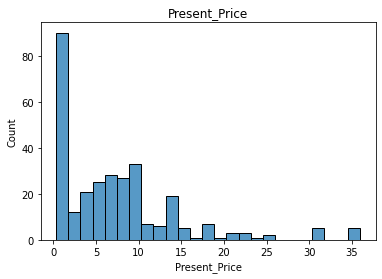

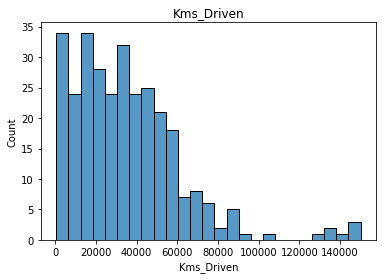

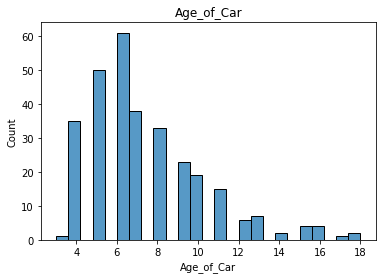

In [44]:
for feature in ['Present_Price','Kms_Driven','Age_of_Car']:
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=dataset_norm_reg,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### 4. Categorical Encoding

In Exploratory Data Analysis we found that there are not many UNIQUE categories in each of the categorical features , So we can use One hot encoding technique for each Cateogrical feature

In [45]:
### One Hot Encoding will be performed on both of the datasets

dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [46]:
dataset_norm_reg=pd.get_dummies(dataset_norm_reg,drop_first=True)
dataset_norm_reg.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


### 5. Feature Transformation

Since we dont need to do transformation If we are using Ensemble Technique , So Feature transformation will only be applied for dataset_norm_reg.Becuase Linear,Ridge,Lasso Regression will be applied on these dataframe.

Ensemble Technique will be applied on 'dataset' dataframe.

To Apply feature transformation , We first need to identify whether each feature is normally distributed or not.

If feature is normally distributed then we will apply - StandardScaler /MinMaxScaler /RobustScaler

If features is not normally distributed we will apply - Gaussian Transformation


###### Identifying Feature Distribution using QQ plot

###### If All points fall in same line then we can say that it is Normally Distributed

Present_Price 



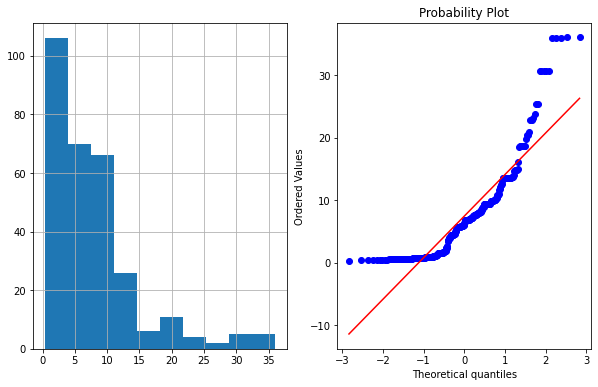



Kms_Driven 



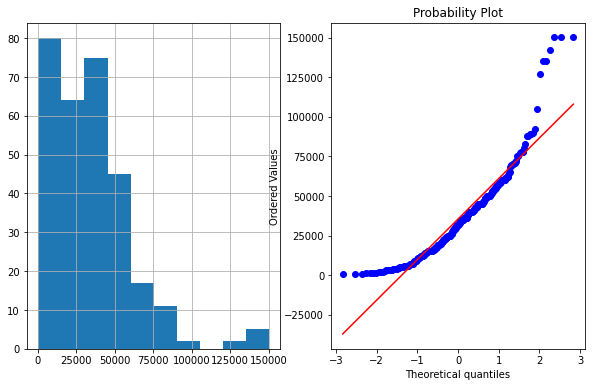



Owner 



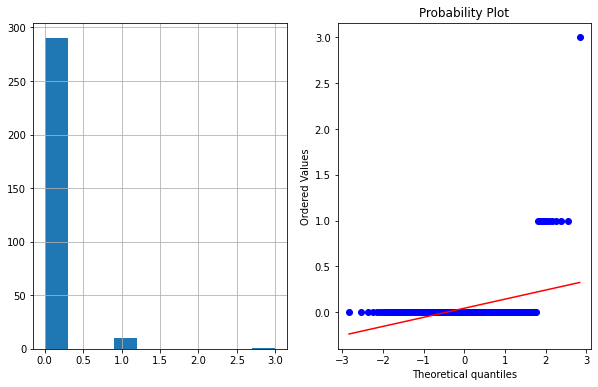



Age_of_Car 



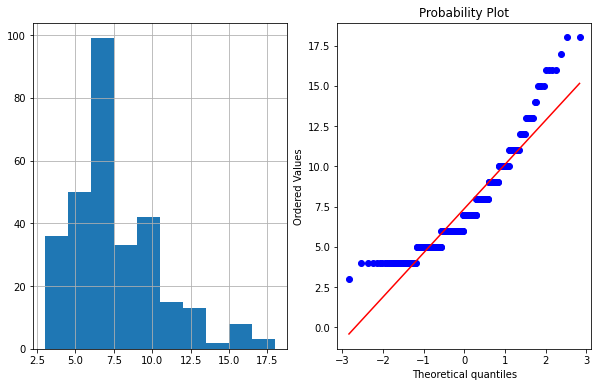



Selling_Price 



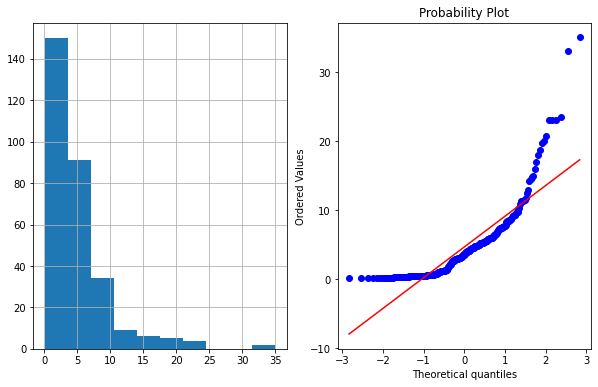

In [47]:
import scipy.stats as stat
import pylab
def plot_data(df,features):
  for feature in features:
    print(feature , '\n')
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    print('\n')

plot_data(dataset_norm_reg,['Present_Price','Kms_Driven','Owner','Age_of_Car','Selling_Price'])

Since All points  are not in same line , We will perform Gaussian Transform becuase data is not normally distributed 


#### Transformation Techinques for each of the Feature

Present_Price_log 



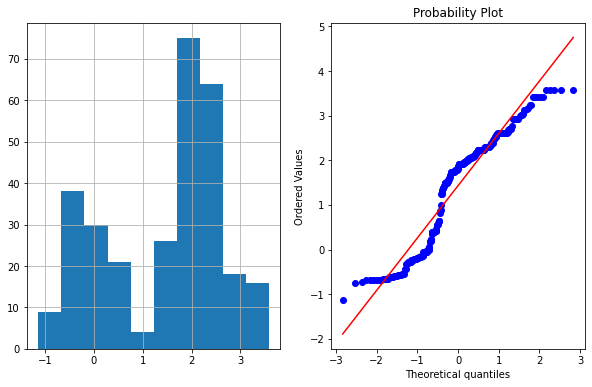



Present_Price_log_avoid_zeros 



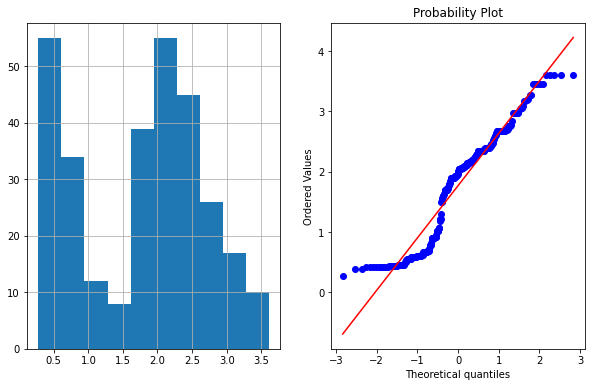



Present_Price_reciprocol 



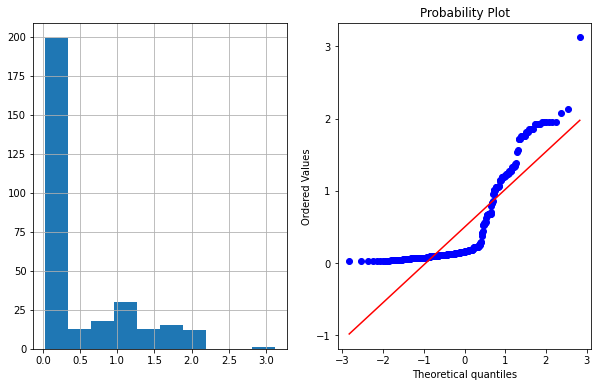



Present_Price_sqrt 



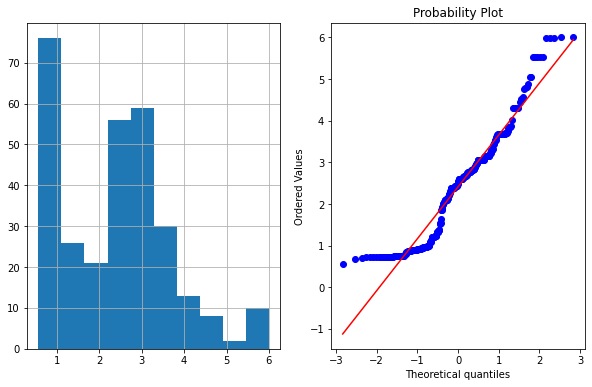



Present_Price_exponential 



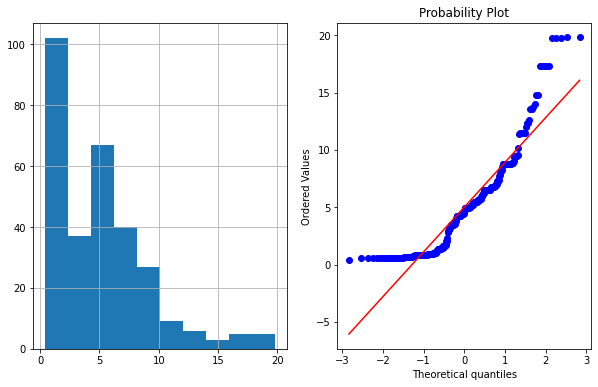



Present_Price_boxcox 



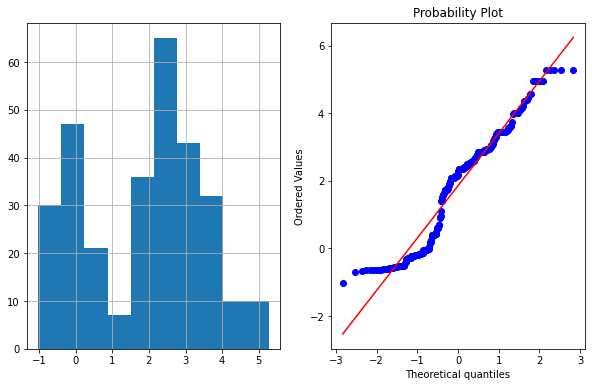

In [48]:
dataset_norm_reg['Present_Price_log'] = np.log(dataset_norm_reg['Present_Price'])
dataset_norm_reg['Present_Price_log_avoid_zeros'] = np.log(dataset_norm_reg['Present_Price']+1)
dataset_norm_reg['Present_Price_reciprocol']  = 1/dataset_norm_reg['Present_Price']
dataset_norm_reg['Present_Price_sqrt'] = dataset_norm_reg['Present_Price']**(1/2)
dataset_norm_reg['Present_Price_exponential'] = dataset_norm_reg['Present_Price']**(1/1.2)
dataset_norm_reg['Present_Price_boxcox'],parameters = stat.boxcox(dataset_norm_reg['Present_Price'])

plot_data(dataset_norm_reg,['Present_Price_log','Present_Price_log_avoid_zeros','Present_Price_reciprocol','Present_Price_sqrt','Present_Price_exponential','Present_Price_boxcox'])

From Above figure , We can conclude that for 'Present_Price' we can either use Box cox transformation or Log Transformation (Avoid Zeros Approach) . We will use Box cox Transformation for 'Present_Price'

Kms_Driven 



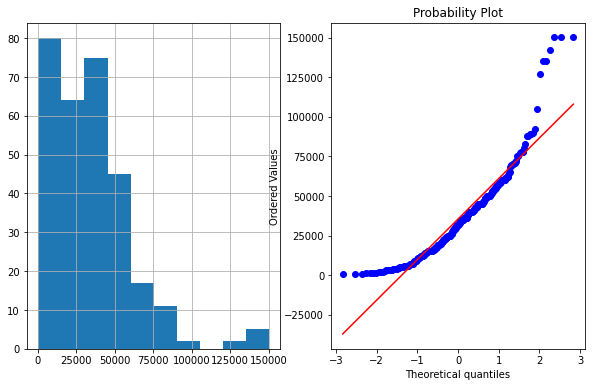



Kms_Driven_log 



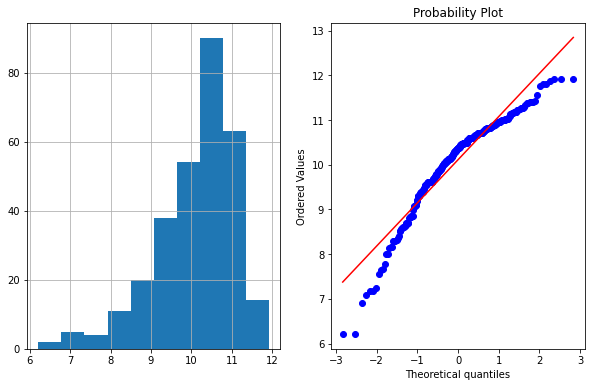



Kms_Driven_log_avoid_zeros 



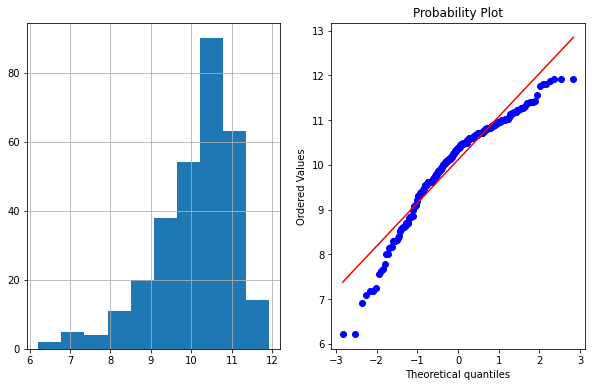



Kms_Driven_reciprocol 



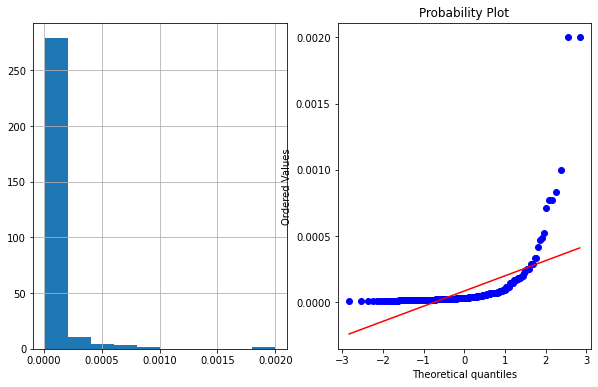



Kms_Driven_sqrt 



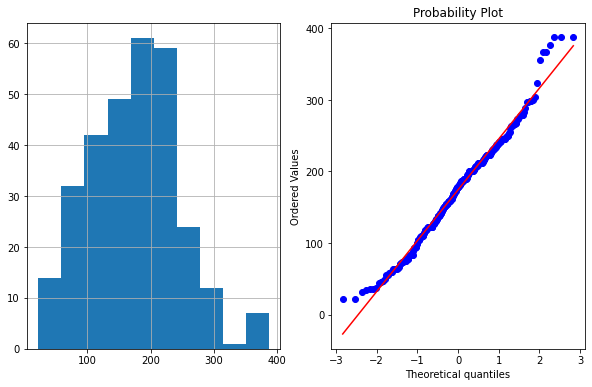



Kms_Driven_exponential 



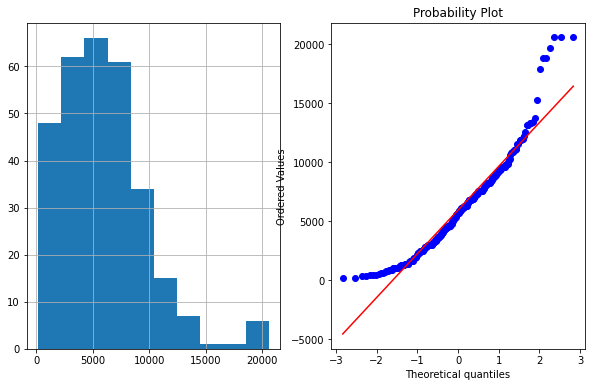



Kms_Driven_boxcox 



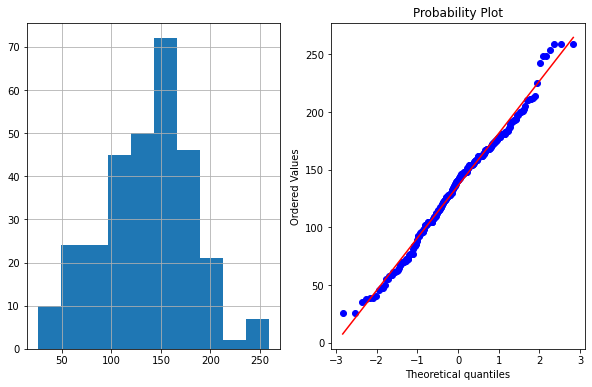

In [49]:
dataset_norm_reg['Kms_Driven_log'] = np.log(dataset_norm_reg['Kms_Driven'])
dataset_norm_reg['Kms_Driven_log_avoid_zeros'] = np.log(dataset_norm_reg['Kms_Driven']+1)
dataset_norm_reg['Kms_Driven_reciprocol']  = 1/dataset_norm_reg['Kms_Driven']
dataset_norm_reg['Kms_Driven_sqrt'] = dataset_norm_reg['Kms_Driven']**(1/2)
dataset_norm_reg['Kms_Driven_exponential'] = dataset_norm_reg['Kms_Driven']**(1/1.2)
dataset_norm_reg['Kms_Driven_boxcox'],parameters = stat.boxcox(dataset_norm_reg['Kms_Driven'])

plot_data(dataset_norm_reg,['Kms_Driven','Kms_Driven_log','Kms_Driven_log_avoid_zeros','Kms_Driven_reciprocol','Kms_Driven_sqrt','Kms_Driven_exponential','Kms_Driven_boxcox'])

For 'Kms_Driven' , We can either use Box Cox or Sqrt Transformation , We will use Box Cox

Age_of_Car 



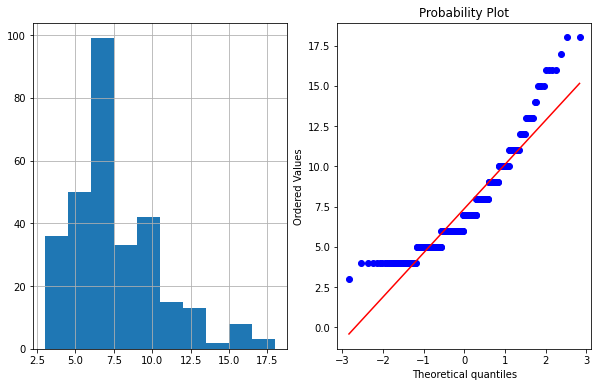



Age_of_Car_log 



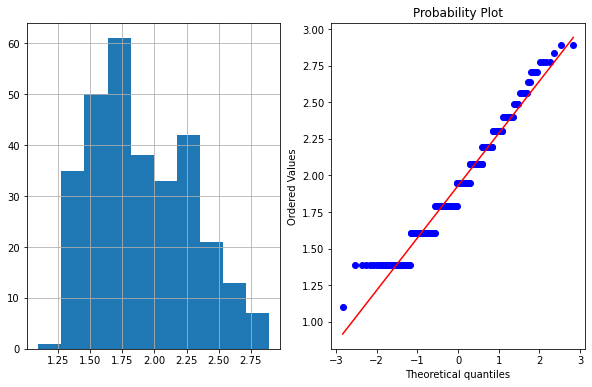



Age_of_Car_log_avoid_zeros 



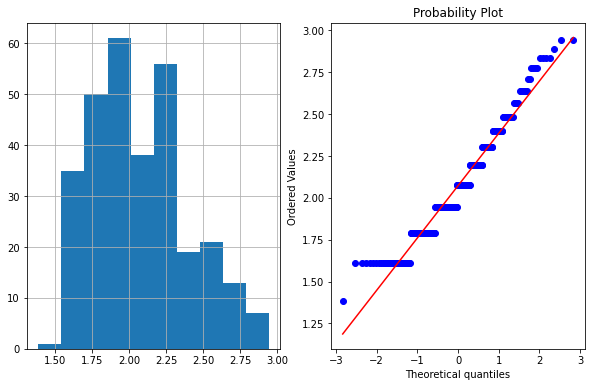



Age_of_Car_reciprocol 



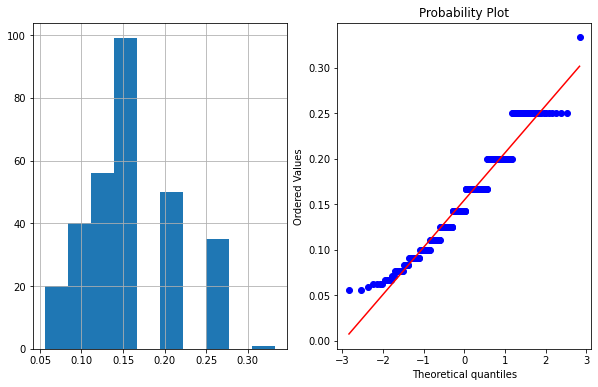



Age_of_Car_sqrt 



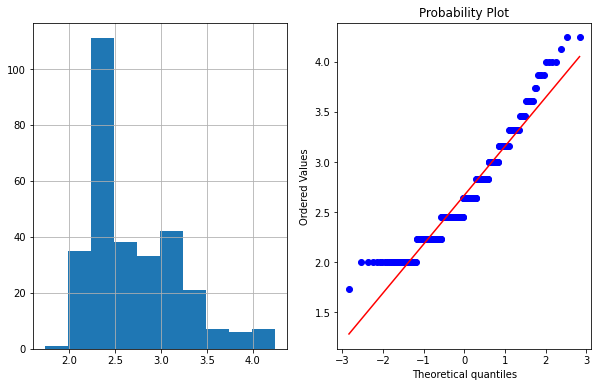



Age_of_Car_exponential 



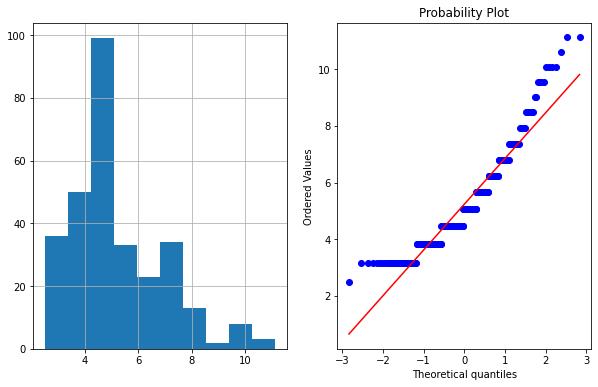



Age_of_Car_boxcox 



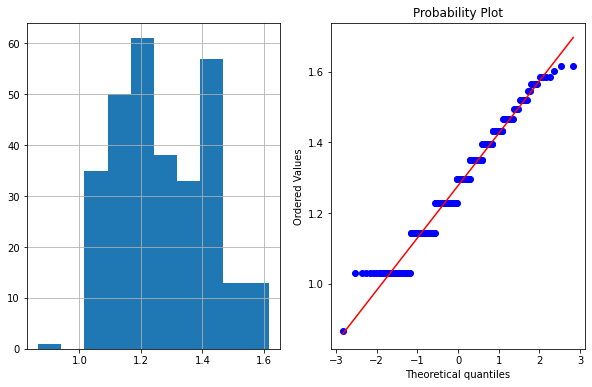

In [50]:
dataset_norm_reg['Age_of_Car_log'] = np.log(dataset_norm_reg['Age_of_Car'])
dataset_norm_reg['Age_of_Car_log_avoid_zeros'] = np.log(dataset_norm_reg['Age_of_Car']+1)
dataset_norm_reg['Age_of_Car_reciprocol']  = 1/dataset_norm_reg['Age_of_Car']
dataset_norm_reg['Age_of_Car_sqrt'] = dataset_norm_reg['Age_of_Car']**(1/2)
dataset_norm_reg['Age_of_Car_exponential'] = dataset_norm_reg['Age_of_Car']**(1/1.2)
dataset_norm_reg['Age_of_Car_boxcox'],parameters = stat.boxcox(dataset_norm_reg['Age_of_Car'])

plot_data(dataset_norm_reg,['Age_of_Car','Age_of_Car_log','Age_of_Car_log_avoid_zeros','Age_of_Car_reciprocol','Age_of_Car_sqrt','Age_of_Car_exponential','Age_of_Car_boxcox'])

For 'Age_of_Car' we can either use 'BoxCox' or 'Log' , We will use Box Cox

Owner 



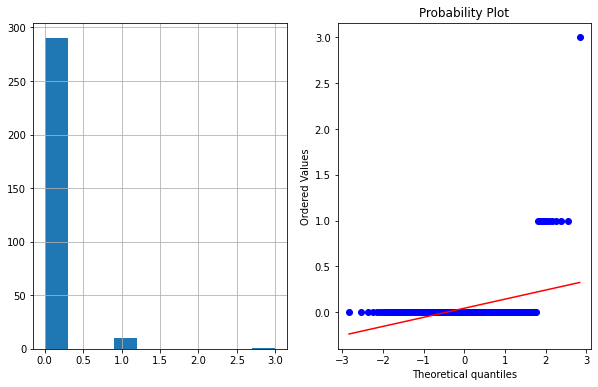



Owner_log_avoid_zeros 



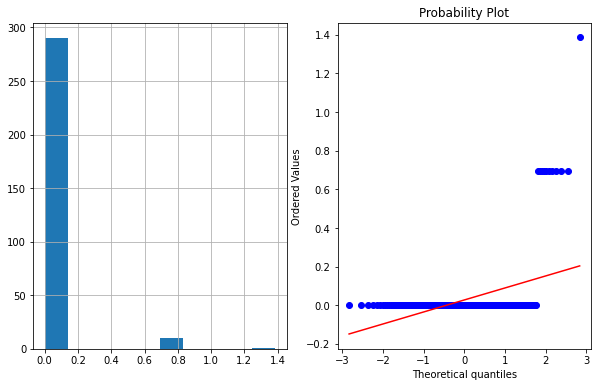



Owner_sqrt 



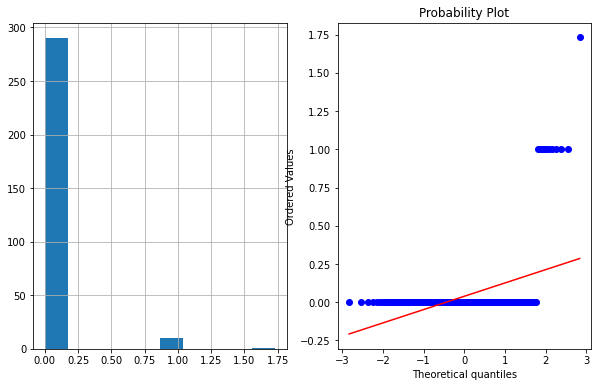



Owner_exponential 



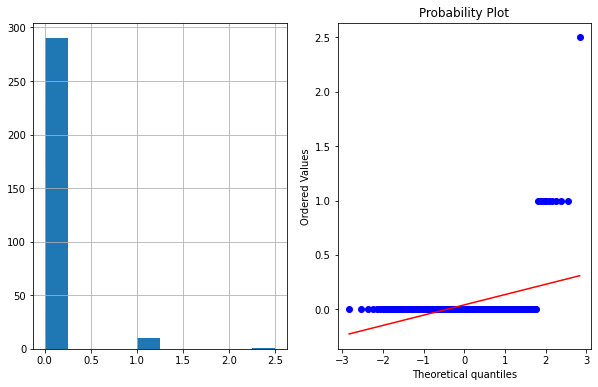

In [51]:
#dataset_norm_reg['Owner_log'] = np.log(dataset_norm_reg['Owner'])
dataset_norm_reg['Owner_log_avoid_zeros'] = np.log(dataset_norm_reg['Owner']+1)
#dataset_norm_reg['Owner_reciprocol']  = 1/dataset_norm_reg['Owner']
dataset_norm_reg['Owner_sqrt'] = dataset_norm_reg['Owner']**(1/2)
dataset_norm_reg['Owner_exponential'] = dataset_norm_reg['Owner']**(1/1.2)
#dataset_norm_reg['Owner_boxcox'],parameters = stat.boxcox(np.abs(dataset_norm_reg['Owner']))

plot_data(dataset_norm_reg,['Owner','Owner_log_avoid_zeros','Owner_sqrt','Owner_exponential'])

For Owner , We will directly apply Standard Scaler 

In [52]:
dataset_norm_reg.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age_of_Car',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Present_Price_log',
       'Present_Price_log_avoid_zeros', 'Present_Price_reciprocol',
       'Present_Price_sqrt', 'Present_Price_exponential',
       'Present_Price_boxcox', 'Kms_Driven_log', 'Kms_Driven_log_avoid_zeros',
       'Kms_Driven_reciprocol', 'Kms_Driven_sqrt', 'Kms_Driven_exponential',
       'Kms_Driven_boxcox', 'Age_of_Car_log', 'Age_of_Car_log_avoid_zeros',
       'Age_of_Car_reciprocol', 'Age_of_Car_sqrt', 'Age_of_Car_exponential',
       'Age_of_Car_boxcox', 'Owner_log_avoid_zeros', 'Owner_sqrt',
       'Owner_exponential'],
      dtype='object')

In [53]:
final_dataset_norm_reg = dataset_norm_reg[['Selling_Price','Present_Price_boxcox','Kms_Driven_boxcox','Owner','Age_of_Car_boxcox','Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual','Transmission_Manual']]
final_dataset_norm_reg.head()

,Selling_Price,Present_Price_boxcox,Kms_Driven_boxcox,Owner,Age_of_Car_boxcox,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,2.060983,132.086547,0,1.296105,0,1,0,1
1,4.75,2.862591,158.706598,0,1.350057,1,0,0,1
2,7.25,2.913370,76.778411,0,1.031144,0,1,0,1
3,2.85,1.650697,68.537470,0,1.433280,0,1,0,1
4,4.60,2.359908,157.903809,0,1.296105,1,0,0,1


In [54]:
final_dataset_norm_reg.columns=['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age_of_Car',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']

final_dataset_norm_reg.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,2.060983,132.086547,0,1.296105,0,1,0,1
1,4.75,2.862591,158.706598,0,1.350057,1,0,0,1
2,7.25,2.913370,76.778411,0,1.031144,0,1,0,1
3,2.85,1.650697,68.537470,0,1.433280,0,1,0,1
4,4.60,2.359908,157.903809,0,1.296105,1,0,0,1


In [55]:
X_norm_reg= final_dataset_norm_reg.iloc[:,1:]
X_norm_reg.head()

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2.060983,132.086547,0,1.296105,0,1,0,1
1,2.862591,158.706598,0,1.350057,1,0,0,1
2,2.913370,76.778411,0,1.031144,0,1,0,1
3,1.650697,68.537470,0,1.433280,0,1,0,1
4,2.359908,157.903809,0,1.296105,1,0,0,1


In [56]:
y_norm_reg = final_dataset_norm_reg['Selling_Price']
y_norm_reg.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### 4. Feature Selection

#### 1. Multivaraite Selection- Correlation Matrix

In [57]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [58]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Correlation between all Independent Features and Dependent Feature

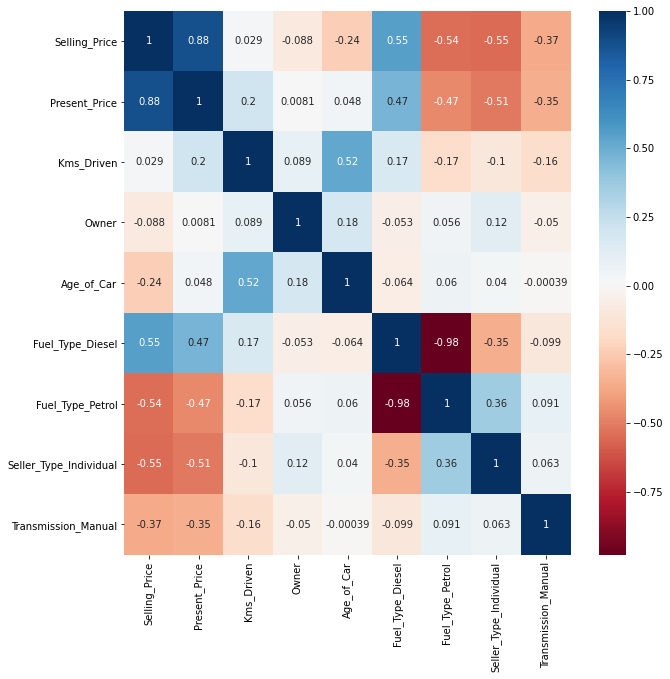

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()

Visualizing Each Feature with Dependent Feature in better way

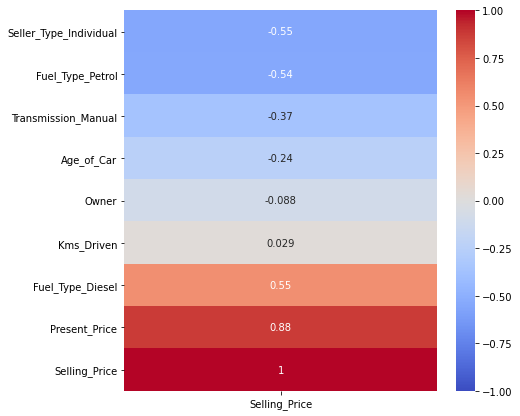

In [60]:
plt.figure(figsize=(7, 7))
sns.heatmap(dataset.corr()[['Selling_Price']].sort_values(by='Selling_Price'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

Summary Between Independent and Dependent Features- Correlation Matrix

1. Fuel_Type_Diesel and Present_Price (with more than +0.5) have considerable positive correlation with Selling_Price.

2. Seller_Type_Individual and Fuel_Type_Petrol (with less than -0.5) have significant negative correlation with Selling_Price.

3. Other features such as Transmission_Manual and Car_Age having correlation coefficient in the range - 0.5 - 0 showed lesser correlation with Selling_Price and, thus will be dropped.


### Correlation between Independent Features

In [61]:
dataset_only_independent = dataset.copy()
dataset_only_independent = dataset_only_independent.drop(['Selling_Price'],axis=1)
dataset_only_independent.head(2)

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1


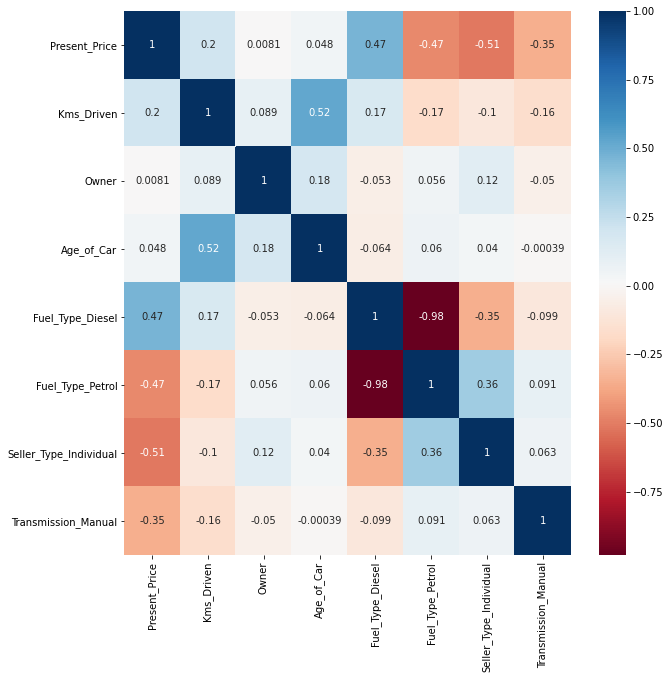

In [62]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset_only_independent.corr(),annot=True,cmap='RdBu')
plt.show()

### Now we will remove One Feature , If two independent features are highly correlated 

Now we will create a function which will take Independent features and remove those which have > threshold values

Following function will select highly correlated features and it will remove first feature that is highle correlated with another feature

In [63]:
def high_correlation_train_set_indpendent(dataset,threshold):
    col_corr = set() #Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # It also consider -ve corr - You can remove abs() - If you dont wont to consider -ve corr
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

### These function return correlated features which are to be removed , Becaause they are correlated with any other feature

In [64]:
corr_features = high_correlation_train_set_indpendent(dataset_only_independent,0.8)
corr_features

{'Fuel_Type_Petrol'}

From Above Result , We can say that Fuel_Type_Petrol' is high correlated with some other feature i-e Fuel_Type_Diesel . So we can remove any one feature from above two . 

Before Removing any Features , We will verify it with some other Feature Importance techniques

##### Feature Selection/Importance Techniques

For now, we have a rough idea of variables that are positively and negatively correlated with the target feature. To make final decision, which variables from highly correlated we will use for our model, we need to access the strength of the "true" correlation between predictors

#### 1. Extra Trees Classifier Technique - Feature Importance

In [65]:
model_feature_Selection = ExtraTreesRegressor()
model_feature_Selection.fit(dataset_only_independent,y_norm_reg)
print(model_feature_Selection.feature_importances_)

[0.37039307 0.04143272 0.00076278 0.07628582 0.22732898 0.00942101
 0.13247967 0.14189595]


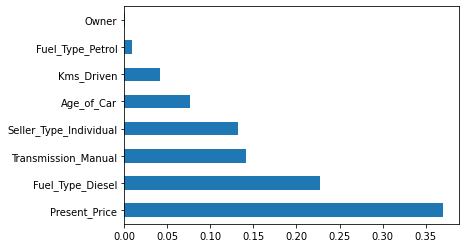

In [66]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_feature_Selection.feature_importances_, index=dataset_only_independent.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

From Above Figure , we can see that Owner , Fuel Type Petrol feature_importance is not that much as compared to other.

Also from above Correlation Matrix values betweeen independent features , We found that Fuel_Type_Petrol was highlt correlated with another independent feature Fuel_Type_Disel . Since Fuel Type Dieasel has more imporatnce , So we will remove Fuel_Type_Petrol as per above figure

### Removing Variables that are not imporatant as per our analysis 

In [67]:
dataset.head()
X= dataset.iloc[:,1:]
X.head()

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [68]:
y = dataset['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [69]:
X = X.drop(['Fuel_Type_Petrol','Owner'],axis=1)
X_norm_reg = X_norm_reg.drop(['Fuel_Type_Petrol','Owner'],axis=1)

In [70]:
display(X.head())
display(X_norm_reg.head())

,Present_Price,Kms_Driven,Age_of_Car,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,7,0,0,1
1,9.54,43000,8,1,0,1
2,9.85,6900,4,0,0,1
3,4.15,5200,10,0,0,1
4,6.87,42450,7,1,0,1


,Present_Price,Kms_Driven,Age_of_Car,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2.060983,132.086547,1.296105,0,0,1
1,2.862591,158.706598,1.350057,1,0,1
2,2.913370,76.778411,1.031144,0,0,1
3,1.650697,68.537470,1.433280,0,0,1
4,2.359908,157.903809,1.296105,1,0,1


#### 5. Model Building

#### Train Test Split

In [72]:
X_train_norm_reg, X_test_norm_reg, y_train_norm_reg, y_test_norm_reg = train_test_split(X_norm_reg, y_norm_reg, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('For Norm Reg : ' , X_train_norm_reg.shape, X_test_norm_reg.shape, y_train_norm_reg.shape, y_test_norm_reg.shape)
print('For Ensemble : ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

For Norm Reg :  (240, 6) (61, 6) (240,) (61,)
For Ensemble :  (240, 6) (61, 6) (240,) (61,)


Before Applying Standardization on X_norm_reg , We will see whether the data is distributed normally or not .

Standardization or Scaling is not required if we use ensemble techniques

So for algorithms other than Ensemble techniques , we will use X_norm_reg dataframe , And for Ensemble we will use X dataframe

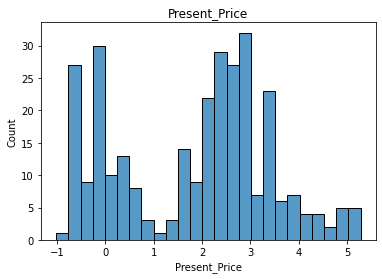

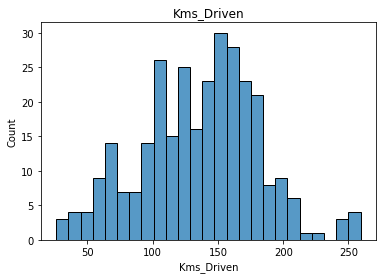

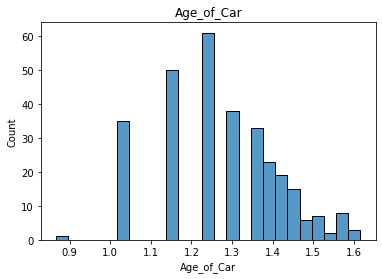

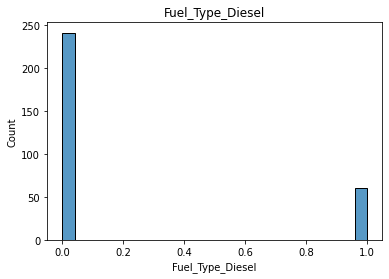

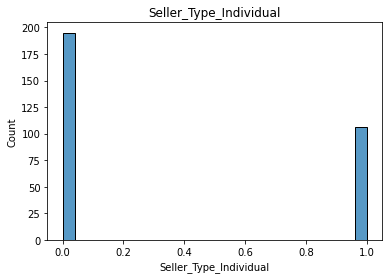

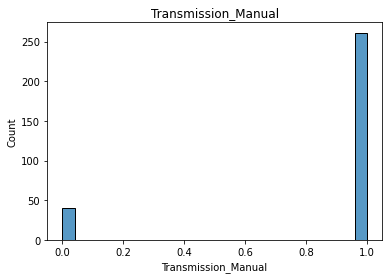

In [73]:
for feature in X_norm_reg.columns:
    data =X_norm_reg.copy()
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=data,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

We need to scale features because some of the regression algorithms as Linear, Lasso, Ridge, KNN require scaling

In [74]:
sc = StandardScaler()
X_train_st_norm_reg = sc.fit_transform(X_train_norm_reg)
X_test_st_norm_reg = sc.transform(X_test_norm_reg)

### Model Building for Scaling Features 

We will use Linear,Ridge,Lasso,knn by using our scaled features

In [75]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Linear Regression': [LinearRegression()],
    'Lasso' :[Lasso()],
    'Ridge' :[Ridge()],
    'KNN' :[KNeighborsRegressor()]}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train_st, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train_st, y_train)
        print(m+' fitted')

mfit(estimators, X_train_st_norm_reg, y_train_norm_reg)

Linear Regression fitted
Lasso fitted
Ridge fitted
KNN fitted


Prediction of Above Fitted Models on Scaled Data


In [78]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test_st, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test_st)
        outcome[m] = [round(metrics.r2_score(y_test, y_pred), 2), 
                      metrics.mean_absolute_error(y_test, y_pred),
                     
                     metrics.mean_squared_error(y_test, y_pred),
                     np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
    return outcome

outcome = mpredict(estimators, X_test_st_norm_reg, y_test_norm_reg)

In [79]:
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

------------------------Linear Regression------------------------
R2 score 0.74
MAE 1.59
MSE 5.74
RMSE 2.4
------------------------Lasso------------------------
R2 score 0.71
MAE 1.44
MSE 6.29
RMSE 2.51
------------------------Ridge------------------------
R2 score 0.74
MAE 1.58
MSE 5.6
RMSE 2.37
------------------------KNN------------------------
R2 score 0.93
MAE 0.82
MSE 1.54
RMSE 1.24


Among all model KNN method score not only the highest r2 values, but at the same time the lowest MAE, MSE, RMSE

Now , lets do the hyperparameter tuning for this method

In [80]:
model = KNeighborsRegressor()

# Select an algorithm
algorithm = KNeighborsRegressor()

# Create 3 folds. We will use 3 fold cross validation
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)


# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10], 'weights': ['uniform','distance']}]


# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train_st_norm_reg, y_train_norm_reg)


# Get the results
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}


As you can see, the best hyperparameters we get are {'n_neighbors': 7, 'weights': 'distance'}. Thus,lets use these exact parameters for our KNN model and see how that would affect MAE, MSE, RMSE, and R2 score.

In [86]:
KNN = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
KNN.fit(X_train_st_norm_reg, y_train_norm_reg)

pred = KNN.predict(X_test_st_norm_reg)

print('MAE:', metrics.mean_absolute_error(y_test_norm_reg, pred))
print('MSE:', metrics.mean_squared_error(y_test_norm_reg, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm_reg, pred)))
print("R2 score =", round(metrics.r2_score(y_test_norm_reg, pred), 2))

MAE: 0.7380434399943276
MSE: 1.3619106552924043
RMSE: 1.1670092781518082
R2 score = 0.94


Yes! We not only improved the R2 score from 0.93 to 0.94, but at the same time further minimized the errors

In [87]:
pred

array([ 7.6479521 ,  3.5631053 ,  0.65886198,  3.67777338,  0.59796644,
        7.23161839,  1.04556675,  2.70676192,  8.31262542,  0.79809754,
        8.86371467,  3.53189687,  5.42221079,  4.03740717,  0.25741067,
        1.28867237,  8.3668798 ,  5.24084649,  6.6465274 ,  8.08205391,
        1.21831438,  3.14043501,  3.96657442,  7.92289618,  4.56990488,
        4.22063382,  3.31199221,  0.80097148,  0.45043905,  0.50882557,
        0.32899567,  0.30537857,  4.90325114, 21.03692647, 23.        ,
        4.0466864 ,  3.47711238,  1.0609088 ,  0.37250038,  6.14704482,
        6.80703436,  9.7560171 ,  0.40951445,  5.09750519,  5.62447127,
        4.12719782,  5.54649668,  5.22604434,  8.0902503 ,  1.0673854 ,
        4.25753623,  0.79749697,  3.36835044,  4.10050542,  1.11774189,
        0.25541868, 18.8132915 ,  0.56502341,  4.71020906,  7.32612618,
        0.76179724])

In [88]:
y_test_norm_reg.values

array([ 7.4 ,  4.  ,  0.5 ,  3.15,  1.25,  5.75,  0.75,  2.65,  8.4 ,
        0.48,  8.35,  3.45,  5.3 ,  4.1 ,  0.2 ,  0.35,  6.85,  6.15,
        5.11,  7.45,  6.  ,  3.25,  5.25,  7.5 ,  2.5 ,  3.25,  3.35,
        0.6 ,  0.3 ,  0.35,  0.3 ,  0.16,  4.4 , 19.99, 23.  ,  4.75,
        3.75,  1.05,  0.2 ,  4.5 , 10.25, 12.9 ,  0.2 ,  4.6 ,  3.95,
        3.75,  7.2 ,  5.95,  7.25,  1.35,  3.35,  0.48,  2.  ,  4.  ,
        1.1 ,  0.2 , 18.75,  0.5 ,  6.45,  5.65,  0.25])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


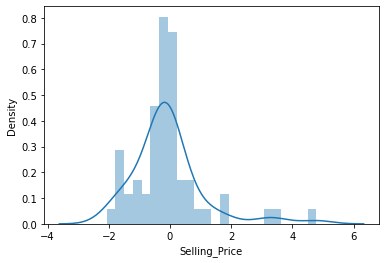

In [90]:
#lest check how the predicted values(pred) are correlated with the sample data(y_test)

sns.distplot(y_test_norm_reg-pred)

Looks like the distribution of predictors strongly resembles the actual one of the test dataset.

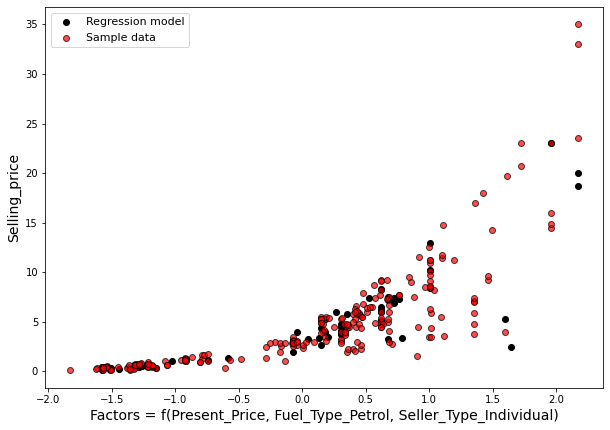

In [92]:

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(X_test_st_norm_reg[:,0], y_test_norm_reg, color='k', label='Regression model')
ax.scatter(X_train_st_norm_reg[:,0], y_train_norm_reg, edgecolor='k', facecolor='red', alpha=0.7, label='Sample data')
ax.set_ylabel('Selling_price', fontsize=14)
ax.set_xlabel('Factors = f(Present_Price, Fuel_Type_Petrol, Seller_Type_Individual)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)


Now we will also Fix Outliers in Selling Price - Dependent variable and then we will see the results , We will identify whether outliers of Dependent variables affect the models

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


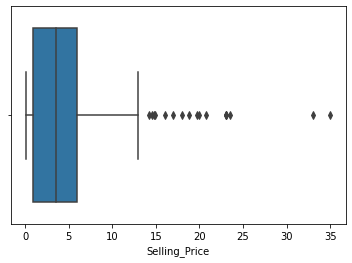

In [94]:
sns.boxplot(dataset['Selling_Price'])

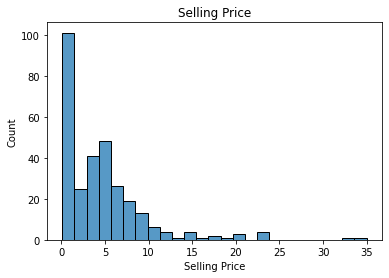

In [96]:
sns.histplot(x='Selling_Price',data=dataset,bins=25)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Selling Price')
plt.show()

In [97]:
dataset_norm_reg[dataset_norm_reg['Selling_Price'] > dataset_norm_reg['Selling_Price'].quantile(0.99)]

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
63,23.5,35.96,47000,0,6,1,0,0,0
64,33.0,36.23,6000,0,4,1,0,0,0
86,35.0,92.60,78000,0,11,1,0,0,1


Find Upper and Lower Extreme Values

In [100]:
lower_upper_not_normal_outlier(['Selling_Price'])

Selling_Price 

Lower Extreme Value :  -14.399999999999999
Upper Extreme Value :  21.299999999999997




Inpute the outliers with the max values that are present for the normal distribution of Selling_Price

In [101]:
dataset_norm_reg[dataset_norm_reg['Selling_Price'] > 21.99]

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Present_Price_log,Present_Price_log_avoid_zeros,Present_Price_reciprocol,Present_Price_sqrt,Present_Price_exponential,Present_Price_boxcox,Kms_Driven_log,Kms_Driven_log_avoid_zeros,Kms_Driven_reciprocol,Kms_Driven_sqrt,Kms_Driven_exponential,Kms_Driven_boxcox,Age_of_Car_log,Age_of_Car_log_avoid_zeros,Age_of_Car_reciprocol,Age_of_Car_sqrt,Age_of_Car_exponential,Age_of_Car_boxcox,Owner_log_avoid_zeros,Owner_sqrt,Owner_exponential
51,23.0,30.61,40000,0,6,1,0,0,0,3.421327,3.453474,0.032669,5.532630,17.306906,4.945219,10.596635,10.596660,0.000025,200.000000,6839.903787,154.248117,1.791759,1.945910,0.166667,2.449490,4.451018,1.229650,0.0,0.0,0.0
63,23.5,35.96,47000,0,6,1,0,0,0,3.582407,3.609836,0.027809,5.996666,19.793218,5.273827,10.757903,10.757924,0.000021,216.794834,7823.748506,164.364290,1.791759,1.945910,0.166667,2.449490,4.451018,1.229650,0.0,0.0,0.0
64,33.0,36.00,6000,0,4,1,0,0,0,3.583519,3.610918,0.027778,6.000000,19.811563,5.276132,8.699515,8.699681,0.000167,77.459667,1407.535559,72.593655,1.386294,1.609438,0.250000,2.000000,3.174802,1.031144,0.0,0.0,0.0
82,23.0,25.39,15000,0,4,1,0,0,0,3.234355,3.272985,0.039386,5.038849,14.809904,4.577064,9.615805,9.615872,0.000067,122.474487,3020.480590,104.649087,1.386294,1.609438,0.250000,2.000000,3.174802,1.031144,0.0,0.0,0.0
86,35.0,36.00,78000,0,11,1,0,0,1,3.583519,3.610918,0.027778,6.000000,19.811563,5.276132,11.264464,11.264477,0.000013,279.284801,11932.886291,200.583341,2.397895,2.484907,0.090909,3.316625,7.376108,1.466356,0.0,0.0,0.0
93,23.0,30.61,40000,0,6,1,0,0,0,3.421327,3.453474,0.032669,5.532630,17.306906,4.945219,10.596635,10.596660,0.000025,200.000000,6839.903787,154.248117,1.791759,1.945910,0.166667,2.449490,4.451018,1.229650,0.0,0.0,0.0


In [102]:
dataset_norm_reg.loc[dataset_norm_reg['Selling_Price'] > 22.00 , 'Selling_Price'] = 22.00

In [105]:
dataset_norm_reg[dataset_norm_reg['Selling_Price'] == 22]

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Present_Price_log,Present_Price_log_avoid_zeros,Present_Price_reciprocol,Present_Price_sqrt,Present_Price_exponential,Present_Price_boxcox,Kms_Driven_log,Kms_Driven_log_avoid_zeros,Kms_Driven_reciprocol,Kms_Driven_sqrt,Kms_Driven_exponential,Kms_Driven_boxcox,Age_of_Car_log,Age_of_Car_log_avoid_zeros,Age_of_Car_reciprocol,Age_of_Car_sqrt,Age_of_Car_exponential,Age_of_Car_boxcox,Owner_log_avoid_zeros,Owner_sqrt,Owner_exponential
51,22.0,30.61,40000,0,6,1,0,0,0,3.421327,3.453474,0.032669,5.532630,17.306906,4.945219,10.596635,10.596660,0.000025,200.000000,6839.903787,154.248117,1.791759,1.945910,0.166667,2.449490,4.451018,1.229650,0.0,0.0,0.0
63,22.0,35.96,47000,0,6,1,0,0,0,3.582407,3.609836,0.027809,5.996666,19.793218,5.273827,10.757903,10.757924,0.000021,216.794834,7823.748506,164.364290,1.791759,1.945910,0.166667,2.449490,4.451018,1.229650,0.0,0.0,0.0
64,22.0,36.00,6000,0,4,1,0,0,0,3.583519,3.610918,0.027778,6.000000,19.811563,5.276132,8.699515,8.699681,0.000167,77.459667,1407.535559,72.593655,1.386294,1.609438,0.250000,2.000000,3.174802,1.031144,0.0,0.0,0.0
82,22.0,25.39,15000,0,4,1,0,0,0,3.234355,3.272985,0.039386,5.038849,14.809904,4.577064,9.615805,9.615872,0.000067,122.474487,3020.480590,104.649087,1.386294,1.609438,0.250000,2.000000,3.174802,1.031144,0.0,0.0,0.0
86,22.0,36.00,78000,0,11,1,0,0,1,3.583519,3.610918,0.027778,6.000000,19.811563,5.276132,11.264464,11.264477,0.000013,279.284801,11932.886291,200.583341,2.397895,2.484907,0.090909,3.316625,7.376108,1.466356,0.0,0.0,0.0
93,22.0,30.61,40000,0,6,1,0,0,0,3.421327,3.453474,0.032669,5.532630,17.306906,4.945219,10.596635,10.596660,0.000025,200.000000,6839.903787,154.248117,1.791759,1.945910,0.166667,2.449490,4.451018,1.229650,0.0,0.0,0.0


In [106]:
y_without_outliers = dataset_norm_reg['Selling_Price']
y_without_outliers

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [107]:
y_without_outliers.values

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 22.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       22.  , 22.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 22.  , 12.5 ,  3.49,  2.5 , 22.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 22.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

In [109]:
y_without_outliers.shape

(301,)

In [110]:
X_norm_reg.head()

,Present_Price,Kms_Driven,Age_of_Car,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2.060983,132.086547,1.296105,0,0,1
1,2.862591,158.706598,1.350057,1,0,1
2,2.913370,76.778411,1.031144,0,0,1
3,1.650697,68.537470,1.433280,0,0,1
4,2.359908,157.903809,1.296105,1,0,1


In [111]:
X_train_norm_reg, X_test_norm_reg, y_train_norm_reg_no_outliers, y_test_norm_reg_no_outliers = train_test_split(X_norm_reg, y_without_outliers, test_size=0.2, random_state=1)

print('For Norm Reg : ' , X_train_norm_reg.shape, X_test_norm_reg.shape, y_train_norm_reg_no_outliers.shape, y_test_norm_reg_no_outliers.shape)


For Norm Reg :  (240, 6) (61, 6) (240,) (61,)


#### Training Scaled Independent Features and Dependent Feature without any Outliers

In [113]:
sc = StandardScaler()
X_train_st_norm_reg = sc.fit_transform(X_train_norm_reg)
X_test_st_norm_reg = sc.transform(X_test_norm_reg)

In [114]:
mfit(estimators, X_train_st_norm_reg, y_train_norm_reg_no_outliers)

Linear Regression fitted
Lasso fitted
Ridge fitted
KNN fitted


In [115]:
outcome = mpredict(estimators, X_test_st_norm_reg, y_test_norm_reg_no_outliers)

In [116]:
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

------------------------Linear Regression------------------------
R2 score 0.77
MAE 1.49
MSE 4.94
RMSE 2.22
------------------------Lasso------------------------
R2 score 0.69
MAE 1.46
MSE 6.64
RMSE 2.58
------------------------Ridge------------------------
R2 score 0.77
MAE 1.48
MSE 4.85
RMSE 2.2
------------------------KNN------------------------
R2 score 0.93
MAE 0.82
MSE 1.53
RMSE 1.24


In [117]:
model = KNeighborsRegressor()

# Select an algorithm
algorithm = KNeighborsRegressor()

# Create 3 folds. We will use 3 fold cross validation
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)


# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10], 'weights': ['uniform','distance']}]


# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train_st_norm_reg, y_train_norm_reg_no_outliers)


# Get the results
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')
{'n_neighbors': 3, 'weights': 'distance'}


In [118]:
KNN = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')
KNN.fit(X_train_st_norm_reg, y_train_norm_reg_no_outliers)

pred = KNN.predict(X_test_st_norm_reg)

print('MAE:', metrics.mean_absolute_error(y_test_norm_reg_no_outliers, pred))
print('MSE:', metrics.mean_squared_error(y_test_norm_reg_no_outliers, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm_reg_no_outliers, pred)))
print("R2 score =", round(metrics.r2_score(y_test_norm_reg_no_outliers, pred), 2))

MAE: 0.7362739587831997
MSE: 1.4378412578849549
RMSE: 1.1991001867587858
R2 score = 0.93


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


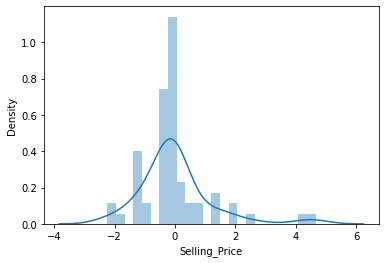

In [119]:
#lest check how the predicted values(pred) are correlated with the sample data(y_test)

sns.distplot(y_test_norm_reg_no_outliers-pred)

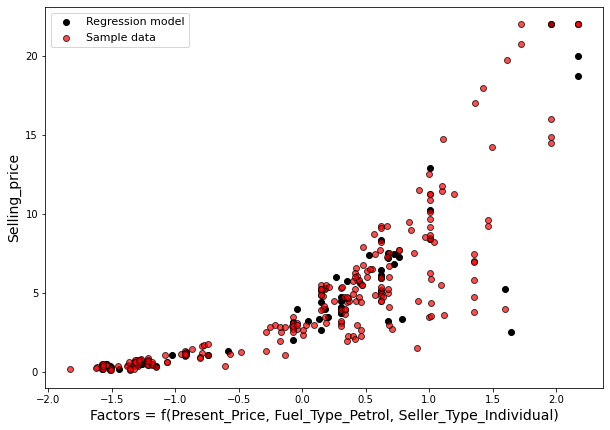

In [120]:

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(X_test_st_norm_reg[:,0], y_test_norm_reg_no_outliers, color='k', label='Regression model')
ax.scatter(X_train_st_norm_reg[:,0], y_train_norm_reg_no_outliers, edgecolor='k', facecolor='red', alpha=0.7, label='Sample data')
ax.set_ylabel('Selling_price', fontsize=14)
ax.set_xlabel('Factors = f(Present_Price, Fuel_Type_Petrol, Seller_Type_Individual)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)


As from above Analysis , We can see that there is not much change when we handle the outliers in Dependent Variables.

We got an accuracy of 94% - KNN when we didnt handle outliers .

Whereas we got an accuracy of 93% - KNN when we handle outliers

#### Now we will build a Model with Dataset which is not scaled at all

i-e No Feature Transformation applied on the Dataset

We will only apply Standard Scaling 

In [121]:
X.head()

,Present_Price,Kms_Driven,Age_of_Car,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,7,0,0,1
1,9.54,43000,8,1,0,1
2,9.85,6900,4,0,0,1
3,4.15,5200,10,0,0,1
4,6.87,42450,7,1,0,1


In [123]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 6)
x test:  (61, 6)
y train:  (240,)
y test:  (61,)


In [125]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [126]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Linear Regression': [LinearRegression()],
    'Lasso' :[Lasso()],
    'Ridge' :[Ridge()],
    'KNN' :[KNeighborsRegressor()],
    'Decision Tree' :[DecisionTreeRegressor()],
    'Ransom Forest' :[RandomForestRegressor()],
    'XG Boost': [XGBRegressor()],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train_st, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train_st, y_train)
        print(m+' fitted')

mfit(estimators, X_train_st, y_train)

Linear Regression fitted
Lasso fitted
Ridge fitted
KNN fitted
Decision Tree fitted
Ransom Forest fitted
[07:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost fitted


In [127]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test_st, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test_st)
        outcome[m] = [round(metrics.r2_score(y_test, y_pred), 2), 
                      metrics.mean_absolute_error(y_test, y_pred),
                     
                     metrics.mean_squared_error(y_test, y_pred),
                     np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
    return outcome

outcome = mpredict(estimators, X_test_st, y_test)

In [128]:
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

------------------------Linear Regression------------------------
R2 score 0.87
MAE 1.09
MSE 2.79
RMSE 1.67
------------------------Lasso------------------------
R2 score 0.78
MAE 1.51
MSE 4.79
RMSE 2.19
------------------------Ridge------------------------
R2 score 0.87
MAE 1.09
MSE 2.79
RMSE 1.67
------------------------KNN------------------------
R2 score 0.94
MAE 0.73
MSE 1.25
RMSE 1.12
------------------------Decision Tree------------------------
R2 score 0.95
MAE 0.67
MSE 1.05
RMSE 1.02
------------------------Ransom Forest------------------------
R2 score 0.91
MAE 0.71
MSE 2.05
RMSE 1.43
------------------------XG Boost------------------------
R2 score 0.94
MAE 0.66
MSE 1.39
RMSE 1.18


We are getting 95% accuracy in Decision Tree , And 94% acccuracy in KNN and XGBoost without using any Feature Transformation Techniques

Also MAE,MSE,RMSE is low in Decision Tree as compared to all other models

Model Building while using Feature Transformation 

In [129]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Decision Tree' :[DecisionTreeRegressor()],
    'Ransom Forest' :[RandomForestRegressor()],
    'XG Boost': [XGBRegressor()],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train_st, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train_st, y_train)
        print(m+' fitted')

mfit(estimators, X_train_st_norm_reg, y_train_norm_reg)

Decision Tree fitted
Ransom Forest fitted
[08:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost fitted


In [130]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test_st, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test_st)
        outcome[m] = [round(metrics.r2_score(y_test, y_pred), 2), 
                      metrics.mean_absolute_error(y_test, y_pred),
                     
                     metrics.mean_squared_error(y_test, y_pred),
                     np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
    return outcome

outcome = mpredict(estimators, X_test_st_norm_reg, y_test_norm_reg)

In [131]:
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

------------------------Decision Tree------------------------
R2 score 0.93
MAE 0.65
MSE 1.45
RMSE 1.2
------------------------Ransom Forest------------------------
R2 score 0.9
MAE 0.67
MSE 2.16
RMSE 1.47
------------------------XG Boost------------------------
R2 score 0.93
MAE 0.66
MSE 1.46
RMSE 1.21


Conclusion:

We get an accuracy of 94% in KNN with lowest MSE,MAE,RMSE Errors w.r.t other models where Outliers and Scaling is Important 

We also applied various other Ensemble Algorithms , And found that Decision tree has accuracy of 95%  ,  whereas all other algorrithms have accuracy in range of 93-94%


#### Saving the best Models

KNN provided same accuracy 94% even if we scale or not scale , So we will directly save model of Without Scaled dataset.

In Other models - Feature Transformation was not required 

In [141]:
estimators = {'Decision Tree' :[DecisionTreeRegressor()],
              'KNN' :[KNeighborsRegressor()],
              'Decision Tree' :[DecisionTreeRegressor()],
              'Ransom Forest' :[RandomForestRegressor()],
              'XG Boost': [XGBRegressor()]}
mfit(estimators, X_train_st, y_train)
outcome = mpredict(estimators, X_test_st, y_test)
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

Decision Tree fitted
KNN fitted
Ransom Forest fitted
[09:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost fitted
------------------------Decision Tree------------------------
R2 score 0.95
MAE 0.65
MSE 1.07
RMSE 1.03
------------------------KNN------------------------
R2 score 0.94
MAE 0.73
MSE 1.25
RMSE 1.12
------------------------Ransom Forest------------------------
R2 score 0.9
MAE 0.7
MSE 2.26
RMSE 1.5
------------------------XG Boost------------------------
R2 score 0.94
MAE 0.66
MSE 1.39
RMSE 1.18


In [142]:
estimators

{'Decision Tree': [DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')],
 'KNN': [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')],
 'Ransom Forest': [RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_frac

In [144]:
for m in estimators:

  # open a file, where you ant to store the data
  file = open(m+'_model.pkl', 'wb')

  # dump information to that file
  pickle.dump(estimators[m][0], file)

#### Load Saving Models

In [147]:
# load the model from disk
loaded_model_decision = pickle.load(open('Decision Tree_model.pkl', 'rb'))
loaded_model_knn = pickle.load(open('KNN_model.pkl', 'rb'))
loaded_model_forest = pickle.load(open('Ransom Forest_model.pkl', 'rb'))
loaded_model_xg = pickle.load(open('XG Boost_model.pkl', 'rb'))

loaded_model_list = [loaded_model_decision,loaded_model_knn,loaded_model_forest,loaded_model_xg]

for loaded_model in loaded_model_list:
  print('------------------------'+str(loaded_model).split('(')[0]+'------------------------')
  pred = loaded_model.predict(X_test_st)
  print("R2 score =", round(metrics.r2_score(y_test, pred), 2))
  print('MAE:', metrics.mean_absolute_error(y_test, pred))
  print('MSE:', metrics.mean_squared_error(y_test, pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

[09:57:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
------------------------DecisionTreeRegressor------------------------
R2 score = 0.95
MAE: 0.6524590163934426
MSE: 1.0687475409836067
RMSE: 1.0338024671007546
------------------------KNeighborsRegressor------------------------
R2 score = 0.94
MAE: 0.7292131147540983
MSE: 1.2525241311475412
RMSE: 1.1191622452296812
------------------------RandomForestRegressor------------------------
R2 score = 0.9
MAE: 0.6965377049180334
MSE: 2.255311630491805
RMSE: 1.5017694997874358
------------------------XGBRegressor------------------------
R2 score = 0.94
MAE: 0.6576970706220534
MSE: 1.3861833619713921
RMSE: 1.1773628845735677


#### Ensemble Technique : Combining Multiple models 

In [157]:
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
xg=XGBRegressor()
dt=DecisionTreeRegressor()


Ens = VotingRegressor( estimators= [('KNN',knn),('RandomForestRegressor',rf),('XGBRegressor',xg),('DT',dt)])

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st , y_train)

pred = Ens.predict(X_test_st)
print("R2 score =", round(metrics.r2_score(y_test, pred), 2))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

#Accuracy of Ensemble learning:
print('Accuracy score of Ensemble Learning is = {:.2f}'.format(Ens.score(X_test_st, y_test)),'%')

[10:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score = 0.95
MAE: 0.5655608991290704
MSE: 1.079175225091756
RMSE: 1.0388335887387141
Accuracy score of Ensemble Learning is = 0.95 %


When we combine multiple models , Then also we are getting accuracy of 95% with lowest MAE,MSE,RMSE errors

Training Ensemble Models on Scaled and Features Transformed Features

In [158]:
## Training the Ensemble learning:
Ens= Ens.fit(X_train_st_norm_reg , y_train_norm_reg)

pred = Ens.predict(X_test_st_norm_reg)
print("R2 score =", round(metrics.r2_score(y_test_norm_reg, pred), 2))
print('MAE:', metrics.mean_absolute_error(y_test_norm_reg, pred))
print('MSE:', metrics.mean_squared_error(y_test_norm_reg, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm_reg, pred)))

#Accuracy of Ensemble learning:
print('Accuracy score of Ensemble Learning is = {:.2f}'.format(Ens.score(X_test_st_norm_reg, y_test_norm_reg)),'%')

[10:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score = 0.97
MAE: 0.4777645635800285
MSE: 0.6296611709199265
RMSE: 0.7935119223552514
Accuracy score of Ensemble Learning is = 0.97 %


As we can see ,All our Analysis helped us to achieve 97% Accuracy 

Also , We can see that we have lowest values of MAE,MSE,RMSE.

**97 % Accuracy **

#### Saving our Final Model : 97% Accuracy

In [159]:
file = open('Combined_model.pkl', 'wb')

# dump information to that file
pickle.dump(Ens, file)

#### Loading our Final Model

In [160]:
loaded_model_combined_model = pickle.load(open('Combined_model.pkl', 'rb'))
pred_combined = loaded_model_combined_model.predict(X_test_st_norm_reg)
print("R2 score =", round(metrics.r2_score(y_test_norm_reg, pred_combined), 2))
print('MAE:', metrics.mean_absolute_error(y_test_norm_reg, pred_combined))
print('MSE:', metrics.mean_squared_error(y_test_norm_reg, pred_combined))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm_reg, pred_combined)))

#Accuracy of Ensemble learning:
print('Accuracy score of Ensemble Learning is = {:.2f}'.format(loaded_model_combined_model.score(X_test_st_norm_reg, y_test_norm_reg)),'%')

[10:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score = 0.97
MAE: 0.4777645635800285
MSE: 0.6296611709199265
RMSE: 0.7935119223552514
Accuracy score of Ensemble Learning is = 0.97 %


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


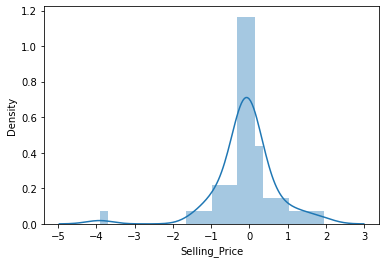

In [161]:
sns.distplot(y_test_norm_reg-pred_combined)

***We have Build our Final Model with Accuracy : 97%***